### Algorithm 1

The first attempt at analyzing session data. 

Per session:
Convert all station data into one record. 

Timestamp: round((tmin + tmax) / 2)
Station: same
Sensors: all sensors involved
Pm2.5: median
Session id: same

In [1]:
################################
# LIBRARIES
################################
import matplotlib.pyplot as plt
from matplotlib import dates
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import os

# Graphing settings
plt.style.use("seaborn")

params = {
    "font.family": "STIXGeneral",
    "mathtext.fontset": "stix",
    "axes.labelsize": 20,
    "legend.fontsize": 20,
    "xtick.labelsize": 18,
    "ytick.labelsize": 18,
    "text.usetex": False,
    "figure.figsize": [10, 5],
    "axes.grid": True,
}

plt.rcParams.update(params)
plt.close("all")

%matplotlib inline

#pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
################################
# FUNCTIONS
################################

def get_middle_value(df, column): 
    # Sort dataframe by column
    t_df = df.sort_values(by=[column])
    
    # Pick out column value in middle
    n = int(len(t_df) / 2)

    row = df.iloc[n]
    
    return row[column]

def algorithm_1_sessions():
    """
    Goes through all sessions and takes the median value for every station record.
    """
    
    # Save all sessions in array
    sessions = []
    
    # Get all date folders
    folders = [f for f in os.listdir('sessions') if os.path.isdir(f'sessions/{f}')]
    folders = [f'sessions/{f}' for f in folders]

    # Go through every folder in folders
    for folder in folders:

        # Get session files in folder
        session_files = [f for f in os.listdir(folder) if f.endswith('.csv')]

        # Some session files must be found to proceed
        # assert len(session_files) > 0, 'No session files found.'
        if len(session_files) <= 0:
            continue
        
        # Go through every session file
        for s_file in session_files:
            # Load session
            raw_session_df = pd.read_csv(folder + '/' + s_file, usecols=['Timestamp', 'Station', 'Sensor', 'PM2.5', 'Session Id'])
            rows = []

            # Get session id
            session_id = raw_session_df.iloc[0]['Session Id']

            # Get all station names
            stations = raw_session_df['Station'].unique()

            # Go through all stations
            for station in stations:
                station_df = raw_session_df[raw_session_df['Station'] == station]

                # Get median timestamp
                timestamp = get_middle_value(station_df, 'Timestamp')
                
                # Split station_df into different sensors
                sensors = sorted(list(station_df['Sensor'].unique()))
                
                # Save median PM2_5
                pm2_5s = np.array([])
                
                for sensor in sensors:
                    # Pick out sensor df
                    sensor_df = station_df[station_df['Sensor'] == sensor]
                    
                    # Get median for sensor
                    pm2_5s = np.append(pm2_5s, get_middle_value(sensor_df, 'PM2.5'))
                    
                # Take mean of all PM values
                PM2_5 = np.mean(pm2_5s)

                # Combine sensors into single label
                sensors_label = ''.join([str(s) for s in sensors])

                # Create row
                date = datetime.strptime(timestamp, '%Y-%m-%d %H:%M:%S').strftime('%Y-%m-%d')
                time = datetime.strptime(timestamp, '%Y-%m-%d %H:%M:%S').time()
                
                rows.append([session_id, timestamp, date, time, station, PM2_5, sensors_label])

            # Combine all stations into one "averaged" session dataframe
            session_df = pd.DataFrame(rows, columns=['Session Id', 'Timestamp', 'Date', 'Time', 'Station', 'PM2.5', 'Sensors'])

            # Add to all sessions
            sessions.append(session_df)
    
    # Combine sessions into one dataframe
    sessions_df = pd.concat(sessions)
    sessions_df.reset_index(drop=True, inplace=True)
    
    # Convert timestamp string column into datetime
    sessions_df['Timestamp'] = sessions_df['Timestamp'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
    
    # Return sessions df
    return sessions_df
    
    

In [3]:
################################
# PLOTTING FUNCTIONS
################################



In [43]:
################################
# FILTER FUNCTIONS
################################

def get_sessions_by_column(df, column, value):
    return df.loc[df[column] == value]

def sort_by_green_line(x_list, y_list):
    green_line = [
        'Islandstorget',
        'Angbyplan',
        'Åkeshov',
        'Brommaplan',
        'Abrahamsberg',
        'Stora mossen',
        'Alvik',
        'Kristineberg',
        'Thorildsplan',
        'Fridhemsplan',
        'St Eriksplan',
        'Odenplan',
        'Rådmansgatan',
        'Hötorget',
        'T-Centralen',
        'Gamla Stan',
        'Slussen',
        'Medborgarplatsen',
        'Skanstull',
        'Gullmarsplan'
    ]

    indexes = {}

    for x, y in zip(x_list, y_list):
        try: 
            i = green_line.index(x)
            if i not in indexes:
                indexes[i] = []
                
            indexes[i].append((x, y))
        except:
            continue

    sorted_line = []
    for i in range(len(green_line)):
        if i in indexes:
            for pair in indexes[i]:
                sorted_line.append(pair)

    sorted_x = [s[0] for s in sorted_line]
    sorted_y = [s[1] for s in sorted_line]
    
    return sorted_x, sorted_y

In [37]:
################################
# SETUP
################################

fig_folder = f'figures/'
df = algorithm_1_sessions()

In [38]:
"""
A v
"""


'\nA v\n'

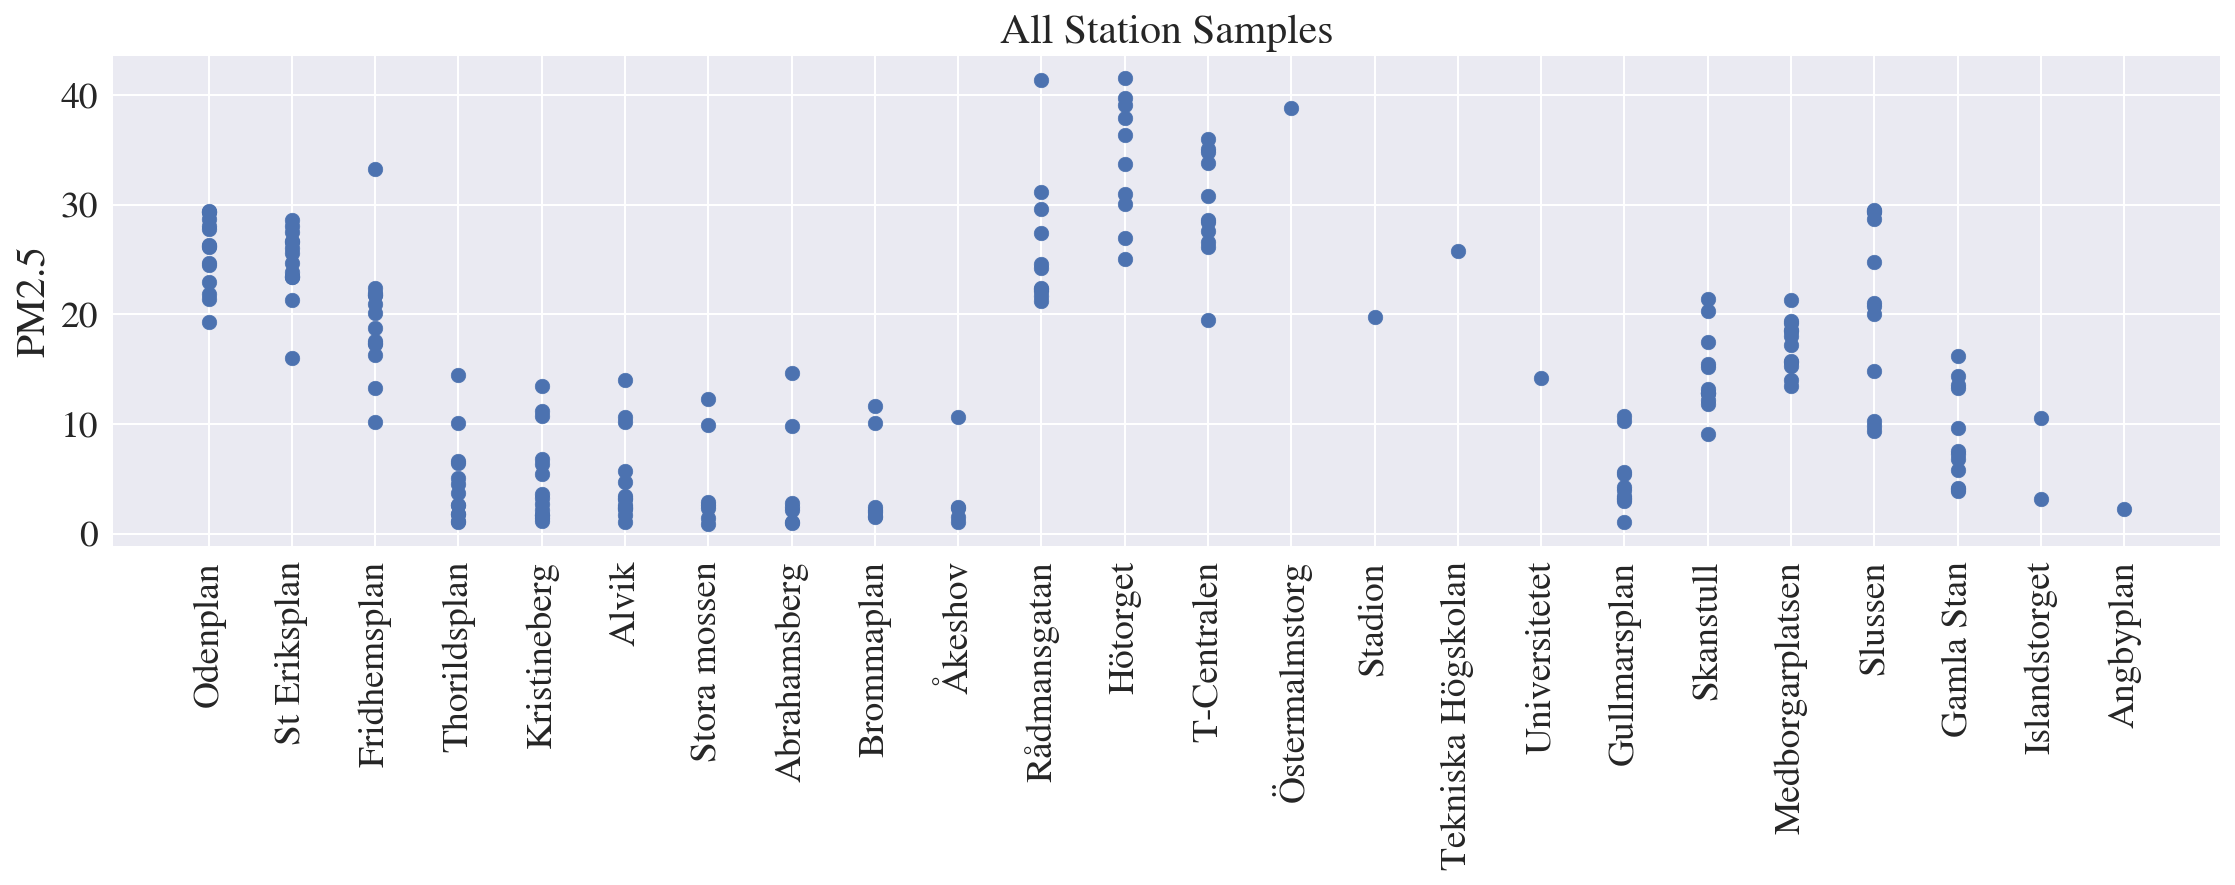

In [7]:
"""
A visualization of all station samples
"""

x = df['Station']
y = df['PM2.5']

fig, ax = plt.subplots(dpi=150, figsize=(15,6))

ax.set_title('All Station Samples', fontsize=20)
ax.set_ylabel('PM2.5')

plt.scatter(x, y)
plt.xticks(rotation=90)
plt.tight_layout()

plt.savefig('figures/all_station_samples.pdf')
plt.show()

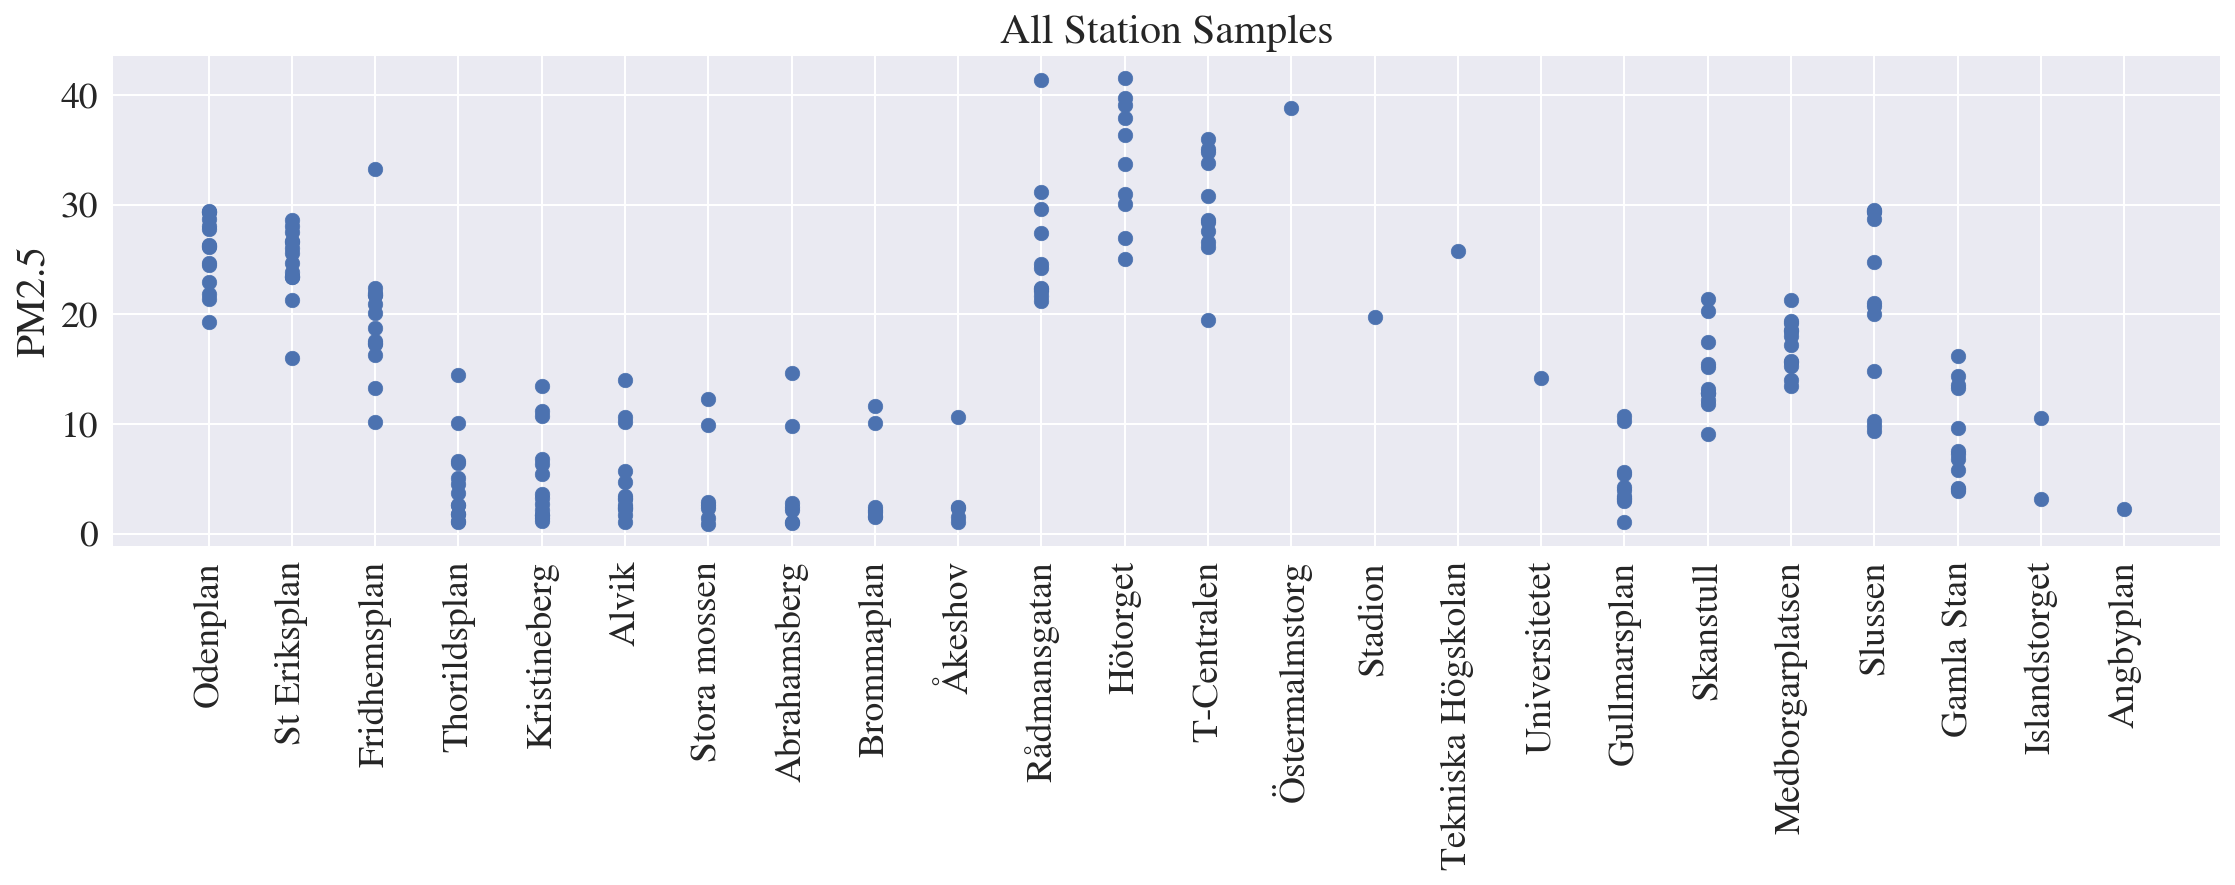

In [21]:
"""
A visualization of all station samples
"""

x = df['Station']
y = df['PM2.5']

fig, ax = plt.subplots(dpi=150, figsize=(15,6))

ax.set_title('All Station Samples', fontsize=20)
ax.set_ylabel('PM2.5')

plt.scatter(x, y)
plt.xticks(rotation=90)
plt.tight_layout()

plt.savefig('figures/all_station_samples.pdf')
plt.show()

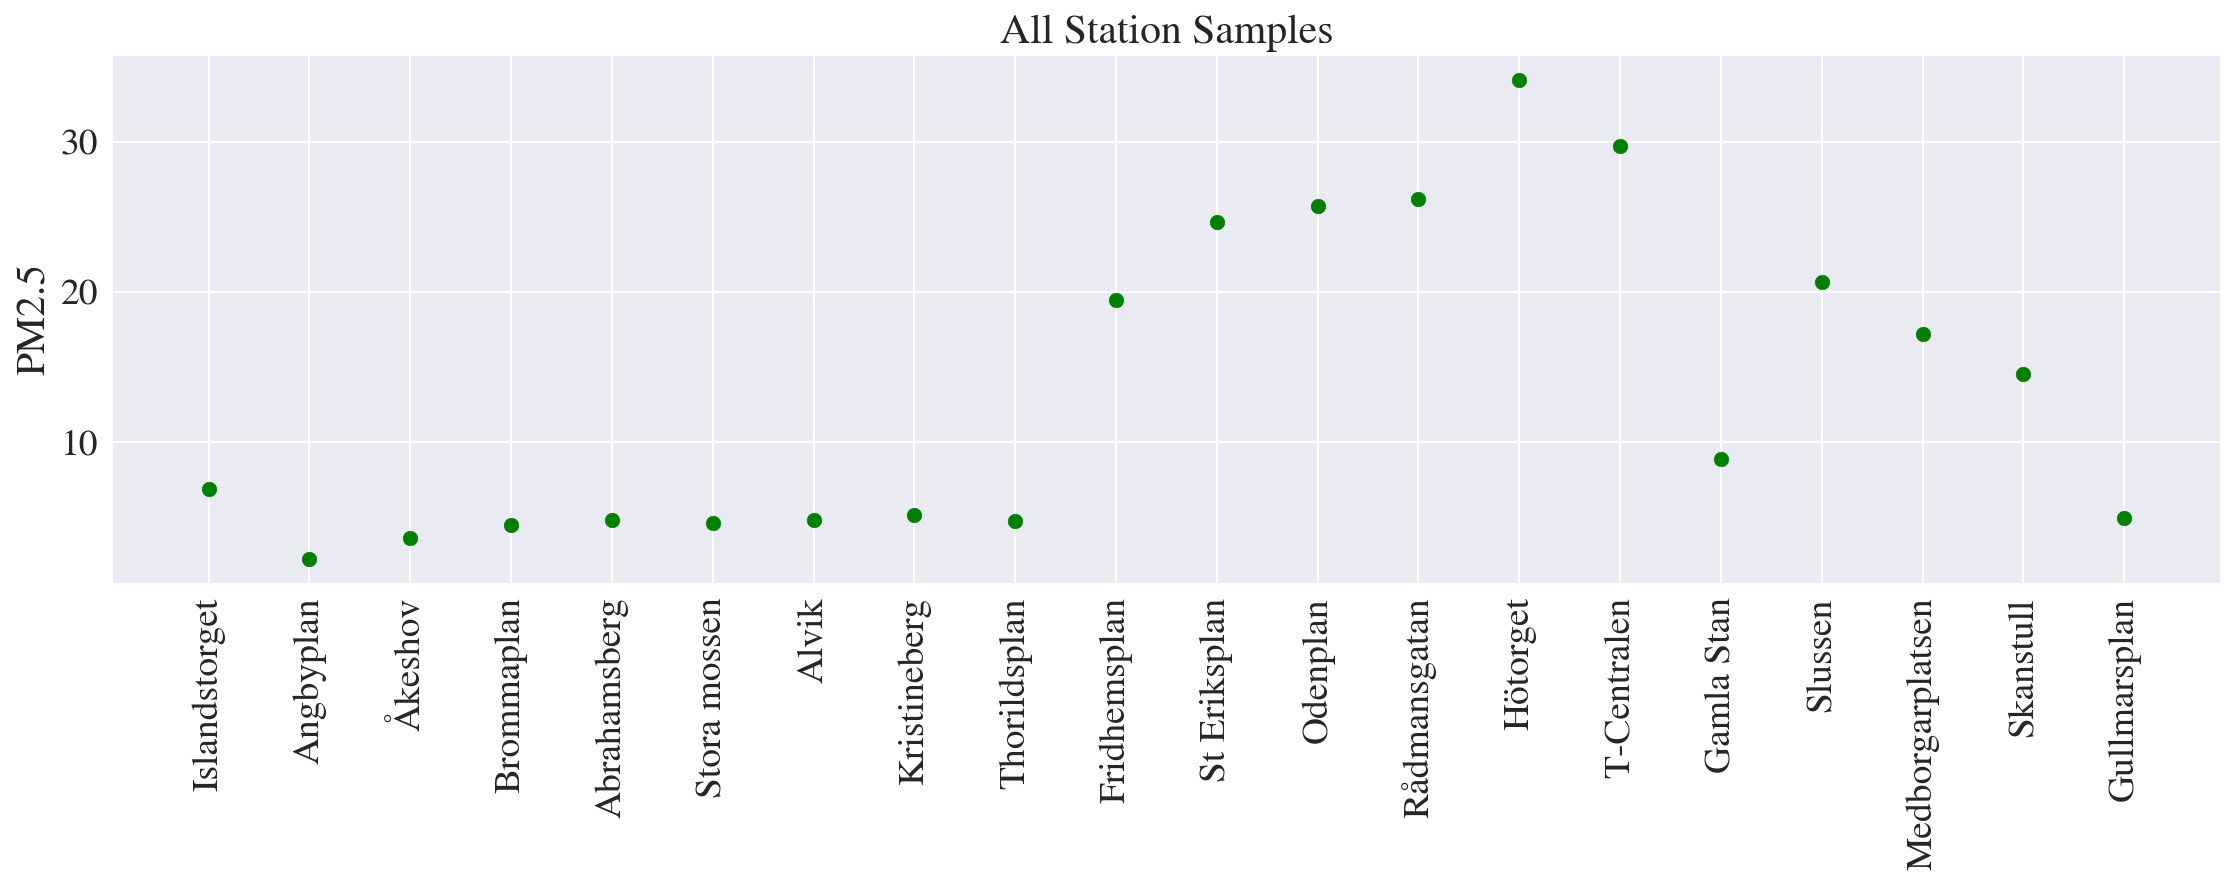

In [41]:
x = list(df['Station'])
y = []

for station in x:
    y.append(np.mean(np.array(df[df['Station'] == station]['PM2.5'])))
    
data = [(x, y) for x, y in zip(x, y)]

green_line = [
    'Islandstorget',
    'Angbyplan',
    'Åkeshov',
    'Brommaplan',
    'Abrahamsberg',
    'Stora mossen',
    'Alvik',
    'Kristineberg',
    'Thorildsplan',
    'Fridhemsplan',
    'St Eriksplan',
    'Odenplan',
    'Rådmansgatan',
    'Hötorget',
    'T-Centralen',
    'Gamla Stan',
    'Slussen',
    'Medborgarplatsen',
    'Skanstull',
    'Gullmarsplan'
]

indexes = {
    
}

for x, y in data:
    try: 
        i = green_line.index(x)
        indexes[i] = (x, y)
    except:
        continue

sorted_line = []
for i in range(len(green_line)):
    sorted_line.append(indexes[i])
    
sorted_x = [s[0] for s in sorted_line]
sorted_y = [s[1] for s in sorted_line]

fig, ax = plt.subplots(dpi=150, figsize=(15,6))

ax.set_title('All Station Samples', fontsize=20)
ax.set_ylabel('PM2.5')

plt.scatter(sorted_x, sorted_y, color='g')
plt.xticks(rotation=90)
plt.tight_layout()

plt.savefig('figures/all_station_samples_sorted.pdf')
plt.show()

# 1: Förmiddag vs. Eftermiddag

In [39]:
# Få ut vår data
df = algorithm_1_sessions()

In [40]:
df

,Session Id,Timestamp,Date,Time,Station,PM2.5,Sensors
0,20211005-3,2021-10-05 15:05:27,2021-10-05,15:05:27,Odenplan,27.772000,12345
1,20211005-3,2021-10-05 15:09:24,2021-10-05,15:09:24,St Eriksplan,25.586000,12345
2,20211005-3,2021-10-05 15:13:57,2021-10-05,15:13:57,Fridhemsplan,16.332000,12345
3,20211005-3,2021-10-05 15:18:18,2021-10-05,15:18:18,Thorildsplan,3.716000,12345
4,20211005-3,2021-10-05 15:22:07,2021-10-05,15:22:07,Kristineberg,3.582000,12345
...,...,...,...,...,...,...,...
203,20211012-1,2021-10-12 07:52:11,2021-10-12,07:52:11,Gullmarsplan,1.026667,123456
204,20211012-1,2021-10-12 07:56:07,2021-10-12,07:56:07,Skanstull,15.456667,123456
205,20211012-1,2021-10-12 07:59:34,2021-10-12,07:59:34,Medborgarplatsen,21.336667,123456
206,20211012-1,2021-10-12 08:02:53,2021-10-12,08:02:53,Slussen,28.753333,123456


In [41]:
# Rusningstrafik morgon
def get_time(timestr):
    return datetime.strptime(timestr, '%H:%M:%S').time()

morning_df = df[(df['Time'] > get_time('06:00:00')) & (df['Time'] < get_time('09:00:00'))]
evening_df = df[(df['Time'] > get_time('16:00:00')) & (df['Time'] < get_time('20:00:00'))]

evening_df.sort_values(by='Station')

,Session Id,Timestamp,Date,Time,Station,PM2.5,Sensors
112,20211006-3,2021-10-06 18:48:12,2021-10-06,18:48:12,Abrahamsberg,1.062000,ABCDE
181,20211013-2,2021-10-13 16:01:08,2021-10-13,16:01:08,Abrahamsberg,1.005000,25
69,20211011-3,2021-10-11 17:27:55,2021-10-11,17:27:55,Abrahamsberg,2.114000,ABCDE
51,20211004-2,2021-10-04 17:03:35,2021-10-04,17:03:35,Abrahamsberg,14.658333,123456
155,20211007-3,2021-10-07 17:01:26,2021-10-07,17:01:26,Abrahamsberg,2.426000,12345
...,...,...,...,...,...,...,...
199,20211012-3,2021-10-12 19:21:07,2021-10-12,19:21:07,Thorildsplan,1.828333,123456
157,20211007-3,2021-10-07 17:11:51,2021-10-07,17:11:51,Åkeshov,2.356000,12345
114,20211006-3,2021-10-06 19:00:20,2021-10-06,19:00:20,Åkeshov,1.096000,ABCDE
53,20211004-2,2021-10-04 17:12:55,2021-10-04,17:12:55,Åkeshov,10.600000,12345


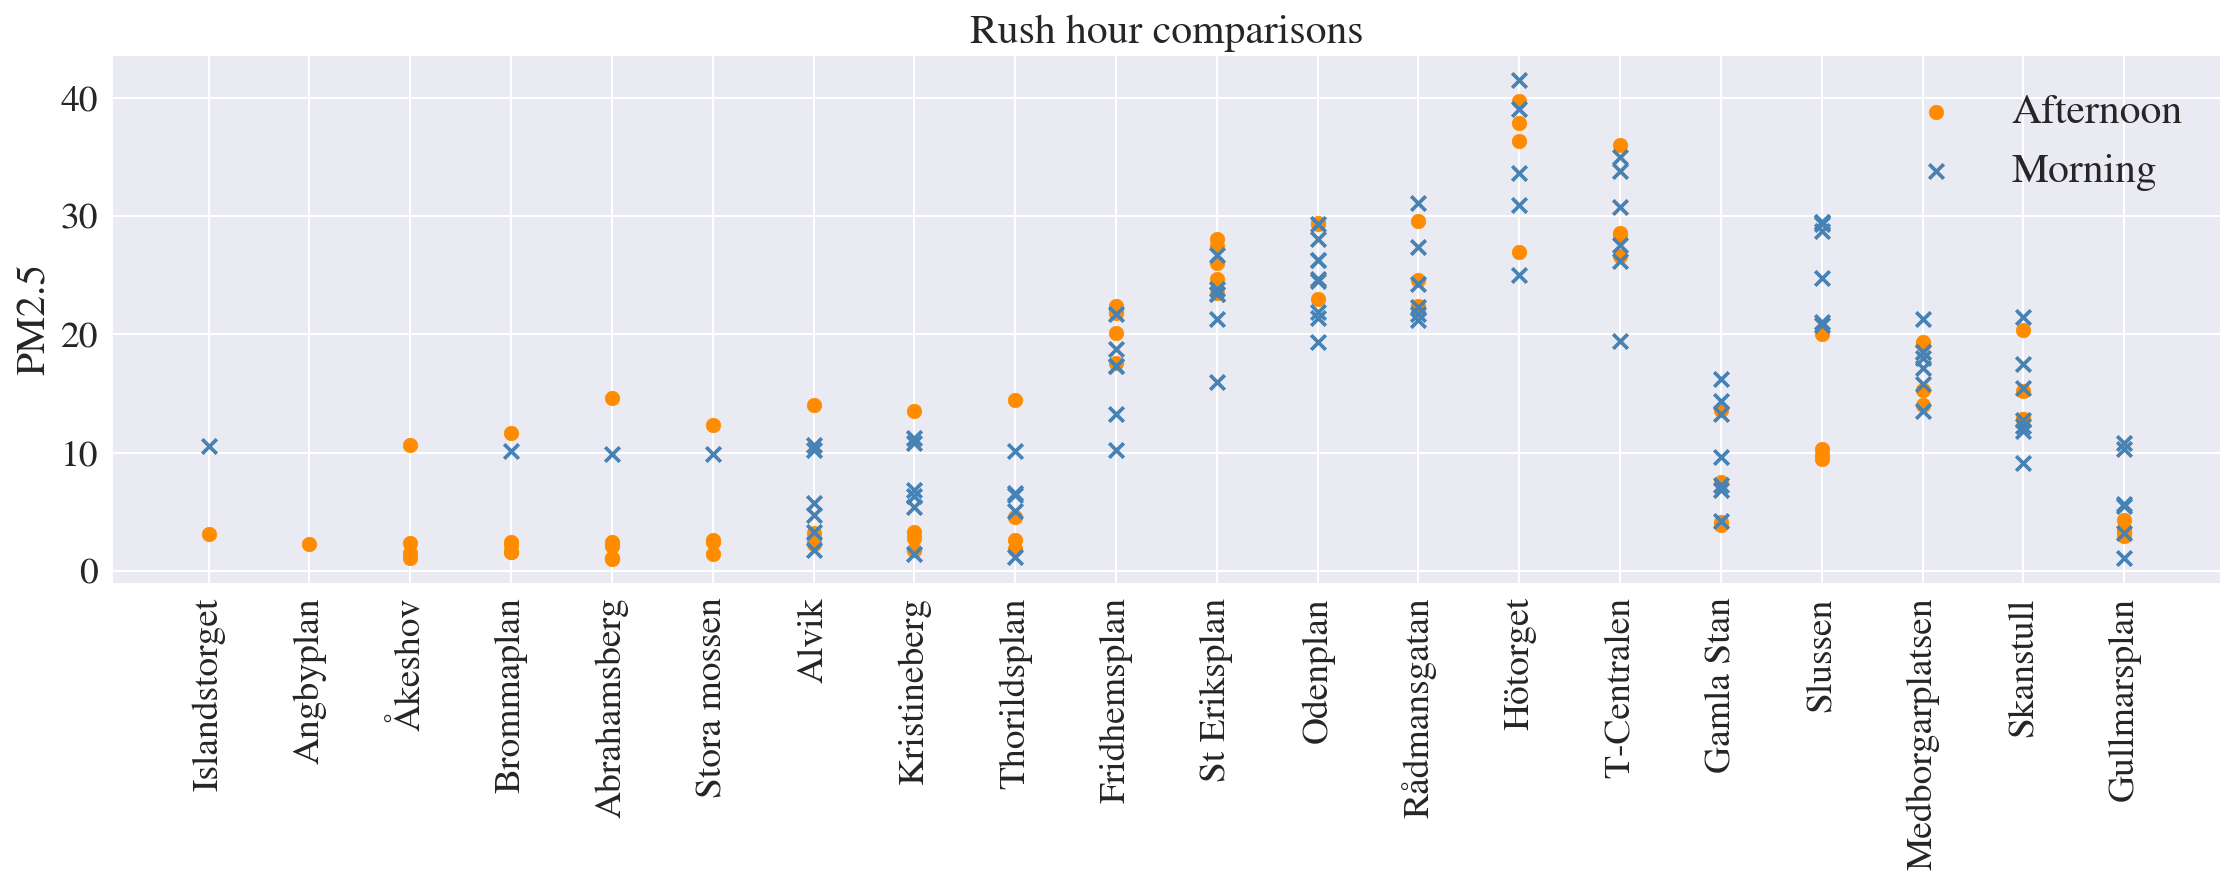

In [58]:
experiment = 'MorningAfternoon'
name = 'rush_hour_sessions_green_line'

x = list(set(list(morning_df['Station']) + list(evening_df['Station'])))

morning_x = list(morning_df['Station'])
morning_y = morning_df['PM2.5']
morning_x, morning_y = sort_by_green_line(morning_x, morning_y)

evening_x = list(evening_df['Station'])
evening_y = evening_df['PM2.5']
evening_x, evening_y = sort_by_green_line(evening_x, evening_y)

fig, ax = plt.subplots(dpi=150, figsize=(15,6))

ax.set_title('Rush hour comparisons', fontsize=20)
ax.set_ylabel('PM2.5')

plt.scatter(evening_x, evening_y, marker='o', color='darkorange', label='Afternoon')
plt.scatter(morning_x, morning_y, marker='x', color='steelblue', label='Morning')

plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()

plt.savefig(f'figures/{experiment}/{name}.pdf')
plt.show()

AttributeError: 'Legend' object has no attribute 'set_facecolor'

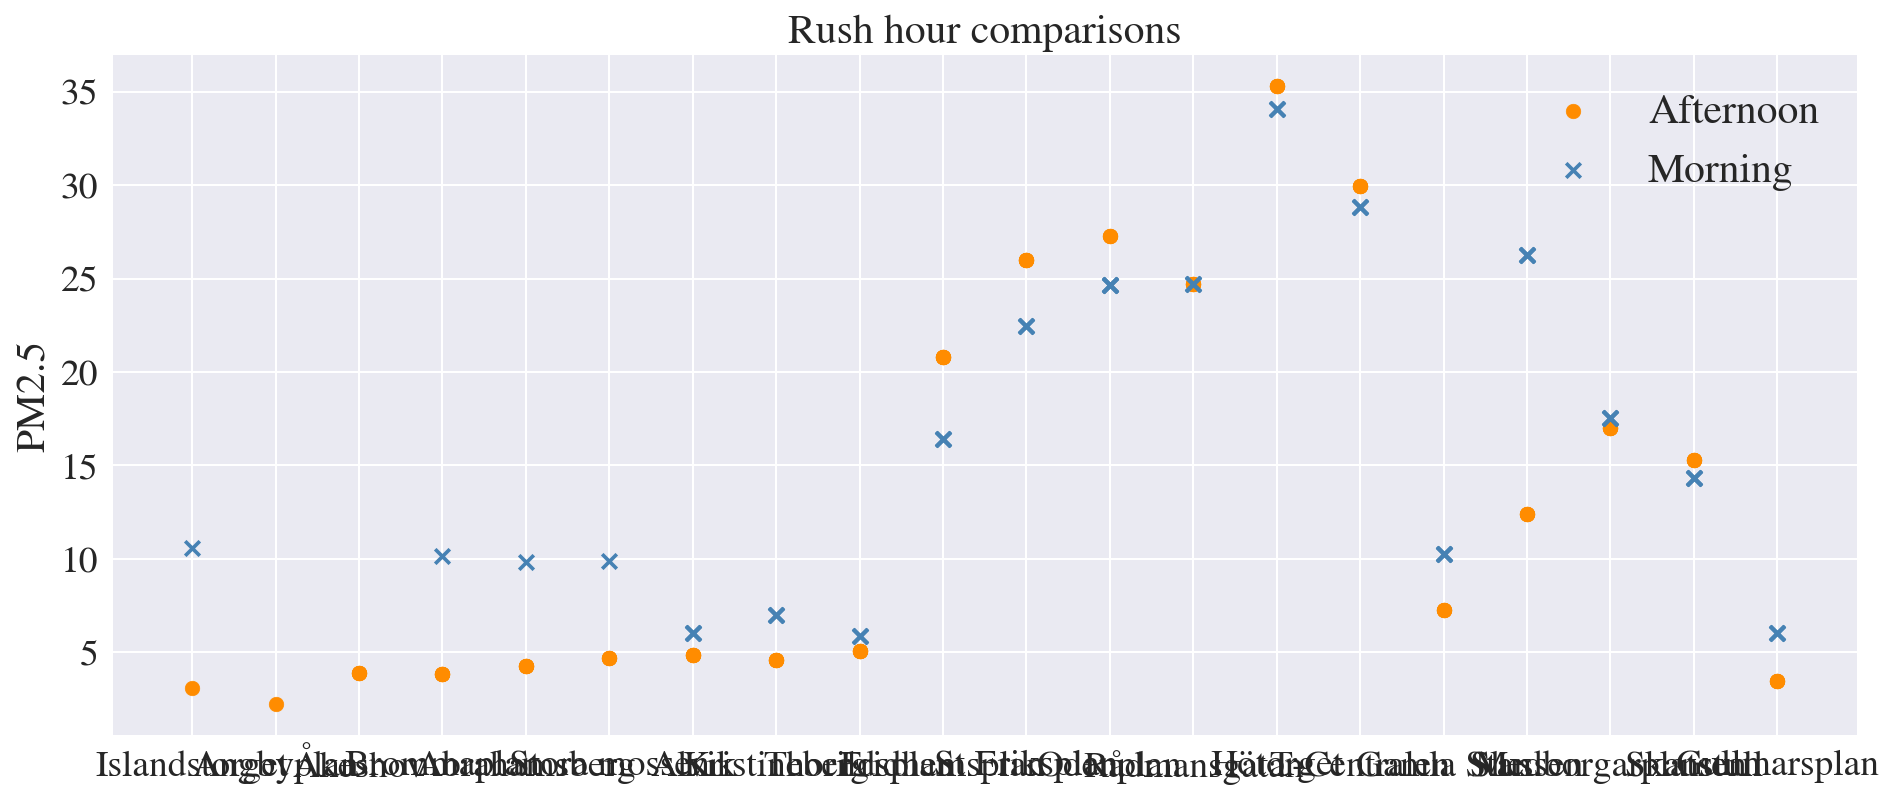

In [68]:
experiment = 'MorningAfternoon'
name = 'rush_hour_green_line'

x = list(set(list(morning_df['Station']) + list(evening_df['Station'])))

morning_x = list(morning_df['Station'])
morning_y = []

for station in morning_x:
    morning_y.append(np.mean(np.array(morning_df[morning_df['Station'] == station]['PM2.5'])))

morning_x, morning_y = sort_by_green_line(morning_x, morning_y)

evening_x = list(evening_df['Station'])
evening_y = []

for station in evening_x:
    evening_y.append(np.mean(np.array(evening_df[evening_df['Station'] == station]['PM2.5'])))

evening_x, evening_y = sort_by_green_line(evening_x, evening_y)

fig, ax = plt.subplots(dpi=150, figsize=(15,6))

ax.set_title('Rush hour comparisons', fontsize=20)
ax.set_ylabel('PM2.5')

plt.scatter(evening_x, evening_y, marker='o', color='darkorange', label='Afternoon')
plt.scatter(morning_x, morning_y, marker='x', color='steelblue', label='Morning')

legend = ax.legend(facecolor='white')
legend.set_facecolor('white')
plt.xticks(rotation=90)
plt.tight_layout()

plt.savefig(f'figures/{experiment}/{name}.pdf')
plt.show()